# Lecture 5 – Pandas IV

### DATA 2201, Fall 2025

A demonstration of advanced `pandas` syntax to accompany Lecture 5.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

## Filtering by Group
Another common use for groups is to filter data.  
`groupby.filter` takes an argument `func`.  
`func` is a function that:
- Takes a DataFrame as input.
- Returns either `True` or `False`.

`filter` applies `func` to each group/sub-DataFrame:
- If `func` returns `True` for a group, then all rows belonging to the group are preserved.
- If `func` returns `False` for a group, then all rows belonging to that group are filtered out.

**Notes:**
- Filtering is done **per group**, not per row. Different from boolean filtering.
- Unlike `agg()`, the column we grouped on does **NOT** become the index!


## Example: groupby.filter()
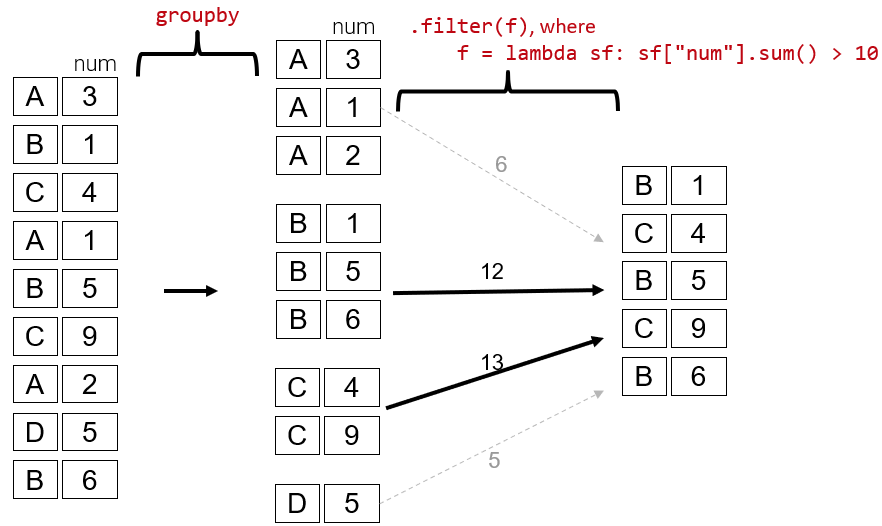

In [ ]:
# Let's read the elections dataset
elections = pd.read_csv("../data/elections.csv")
elections.sample(5)

Let's keep only the elections years where the maximum vote share `%` is less than 45%.


<details>
<summary>Click to show solution</summary>

<pre>

elections.groupby("Year").filter(lambda sf: sf["%"].max() < 45).head(10)

</pre>
</details>



### `groupby` Puzzle

Assume that we want to know the best election by each party.

#### Attempt #1

- We have to be careful when using aggregation functions. 
- For example, the code below might be misinterpreted to say that Woodrow Wilson successfully ran for election in 2020. Why is this happening?


<details>
<summary>Click to show solution</summary>

<pre>

elections.groupby("Party").agg(max).head(10)

</pre>
</details>



#### Attempt #2

- Next, we'll write code that properly returns _the best result by each party_. 
- That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above). 
- Here's what the first rows of the correct output should look like:

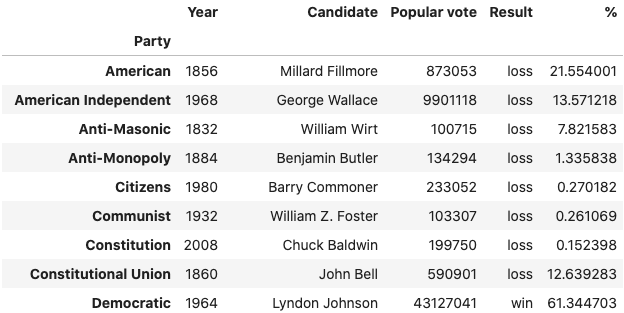

In [ ]:
elections_sorted_by_percent = ...
elections_sorted_by_percent.head(8)


<details>
<summary>Click to show solution</summary>

<pre>

elections_sorted_by_percent = elections.sort_values("%", ascending=False)

</pre>
</details>




<details>
<summary>Click to show solution</summary>

<pre>

elections_sorted_by_percent.groupby("Party").first()

</pre>
</details>



#### Alternative Solutions

You'll soon discover that with `Pandas` rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity, and more. It will take some experience for you to develop a sense of which approach is better for each problem, but you should, in general, try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

- Here are a couple of other ways of obtaining the same result (in each case, we only show the top part with `head()`). 
    - The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  
    - We then index and sort by `Party` to match the requested formatting:


<details>
<summary>Click to show solution</summary>

<pre>

elections.groupby("Party")["%"].idxmax()

</pre>
</details>



In [ ]:
# This is the computational part
best_per_party = ...

# This indexes by Party to match the formatting above
best_per_party.set_index('Party').sort_index().head() 


<details>
<summary>Click to show solution</summary>

<pre>

best_per_party = elections.loc[elections.groupby("Party")["%"].idxmax()]

</pre>
</details>



And this one doesn't even use `groupby`! This approach instead uses the `drop_duplicates` method to keep only the last occurrence of of each party after having sorted by "%", which is the best performance.  Again, the 2nd line is purely formatting:

In [ ]:
best_per_party2 = ...
best_per_party2.set_index("Party").sort_index().head()  # Formatting


<details>
<summary>Click to show solution</summary>

<pre>

best_per_party2 = elections.sort_values("%").drop_duplicates(["Party"], keep="last")

</pre>
</details>



### *Challenge:* See if you can find yet another approach that still gives the same answer.

### `DataFrameGroupBy` Objects

- The result of `groupby` is not a `DataFrame` or a list of `DataFrame`s.
- It is instead a special type called a `DataFrameGroupBy`.

In [ ]:
grouped_by_party = ...
type(grouped_by_party)


<details>
<summary>Click to show solution</summary>

<pre>

grouped_by_party = elections.groupby("Party")

</pre>
</details>



`GroupBy` objects are structured like dictionaries. In fact, we can actually see the dictionaries with the following code:

In [ ]:
grouped_by_party.groups

The `key`s of the dictionary are the groups (in this case, `Party`), and the `value`s are the **indices** of rows belonging to that group. We can access a particular sub-`DataFrame` using `get_group`:

In [ ]:
grouped_by_party.get_group("Socialist")

---

## Pivot Tables

### `Groupby` with multiple columns

- We want to build a table showing the total number of babies born of each sex in each year.
- One way is to `groupby` using both columns of interest:

In [ ]:
# write your code here to do that
babynames.


<details>
<summary>Click to show solution</summary>

<pre>

babynames.groupby(["Year", "Sex"])[["Count"]].sum().head(6)

</pre>
</details>



### `pivot_table`

In [ ]:
babynames.pivot_table(
    ...    
).head(6)


<details>
<summary>Click to show solution</summary>

<pre>

babynames.pivot_table(
    index = "Year", 
    columns = "Sex", 
    values = "Count", 
    aggfunc = np.sum).head(6)

</pre>
</details>



### Pivot Table Mechanics
<img src="images/pivote_image.png" alt="Image" width="600">

### `pivot_table` with Multiple values

In [ ]:
babynames.pivot_table(
    ...
).head(6)


<details>
<summary>Click to show solution</summary>

<pre>

babynames.pivot_table(
    index = "Year", 
    columns = "Sex", 
    values = ["Count", "Name"], 
    aggfunc = np.max).head(6)

</pre>
</details>



---

## Join Tables in pandas
- Joining tables (also called *merging*) is a common operation to combine data from multiple DataFrames based on shared keys (columns).
- In pandas, this is typically done using the `.merge()` function.

#### Example: What if we want to know the popularity of presidential candidates' first names in California in 2022? What can we do?

In [ ]:
elections.head(10)

In [ ]:
babynames_2022 = ...
babynames_2022.head(10)


<details>
<summary>Click to show solution</summary>

<pre>

babynames_2022 = babynames[babynames["Year"] == 2022]

</pre>
</details>



In [ ]:
elections["First Name"] = ...
elections


<details>
<summary>Click to show solution</summary>

<pre>

elections["First Name"] = elections["Candidate"].str.split(" ").str[0]

</pre>
</details>



Unlike in DATA 1202, the join function is called `merge` in pandas. `join` in pandas does something slightly different—we won't talk about it in this class.

In [ ]:
merged = pd.merge(left = elections, right = babynames_2022, 
                  left_on = "First Name", right_on = "Name")
merged

In [ ]:
merged.sort_values("Count", ascending=False)

# See You Next Lecture!